# LetsGrowMore (LGMVIP MAR 2022)
## Author Name - Akalbir Singh Chadha 
### Task 1 - Iris Flower Classification ML Project 


### Importing all the necessary dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")

### Importing the dataset

In [4]:
df=pd.read_csv(r"C:\Users\Akalbir\LGMVIP-DataScience-main\LGMVIP-DataScience-main\Beginner Level\Task 1\Iris.csv")
df.head(10)


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


### Checking the shape of the dataset

In [6]:
print('The dataset has {} rows and {} columns'.format(df.shape[0],df.shape[1]))


The dataset has 150 rows and 5 columns


### Staistical Description of the Data

In [7]:
df.describe(include="all")

,sepal_length,sepal_width,petal_length,petal_width,class
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-virginica
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


### Checking the data to undertsand if there are any null values

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<h3>CHECKING FOR MISSING VALUES</h3>

In [8]:
df.isnull().sum()


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

### Exploratory Data Analysis    


### Plotting Box Plots to check for outliers

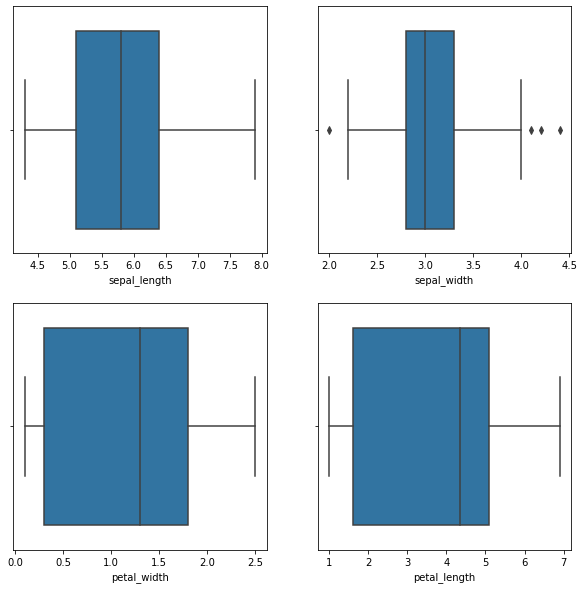

In [66]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(x=df["sepal_length"])

plt.subplot(2,2,2)
sns.boxplot(x=df["sepal_width"])

plt.subplot(2,2,3)
sns.boxplot(x=df["petal_width"])

plt.subplot(2,2,4)
sns.boxplot(x=df["petal_length"])
plt.show()

### Handling the outliers 

In [9]:
print(df['sepal_width'].quantile(0.50)) 
print(df['sepal_width'].quantile(0.95)) 

3.0
3.8


In [10]:
df['sepal_width'] = np.where(df['sepal_width'] >3.8,3, df['sepal_width'])

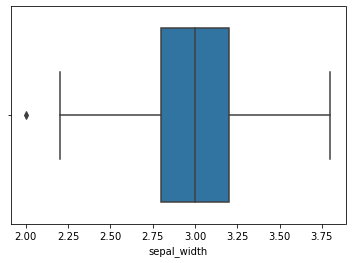

In [11]:
sns.boxplot(x=df["sepal_width"])

<h3>DATA VISUALIZATION</h3>

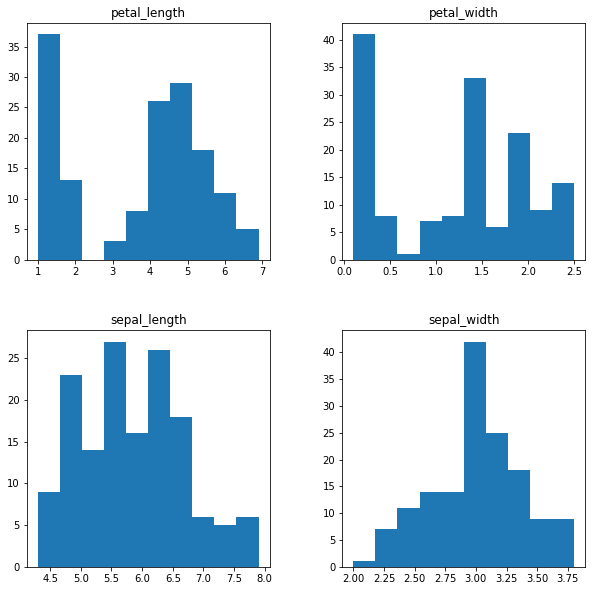

In [12]:
df.hist(figsize=(10,10),grid= False)
plt.show()

<Figure size 720x720 with 0 Axes>

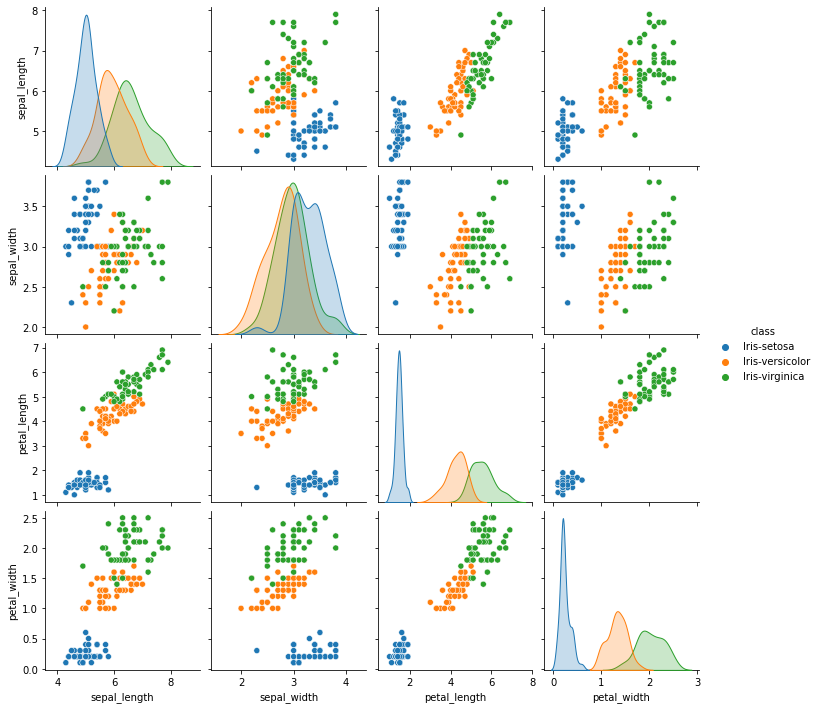

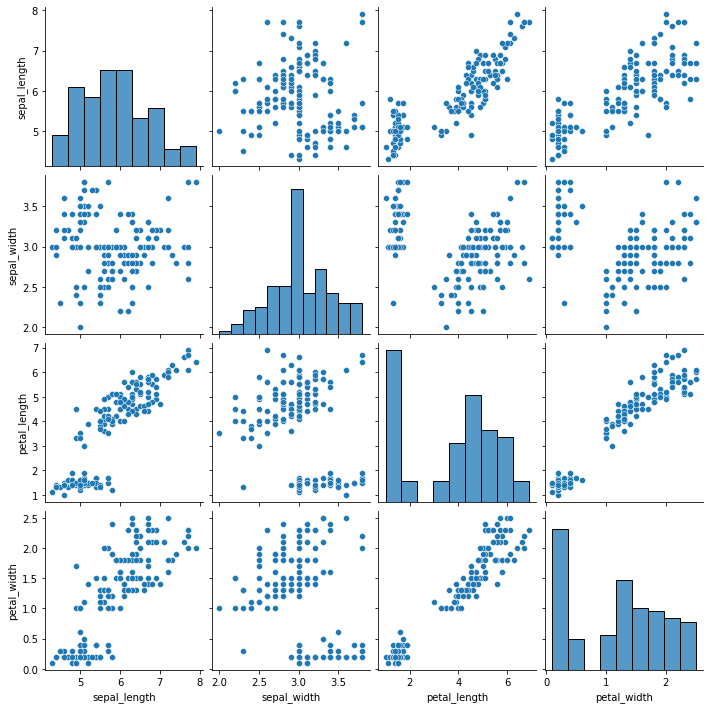

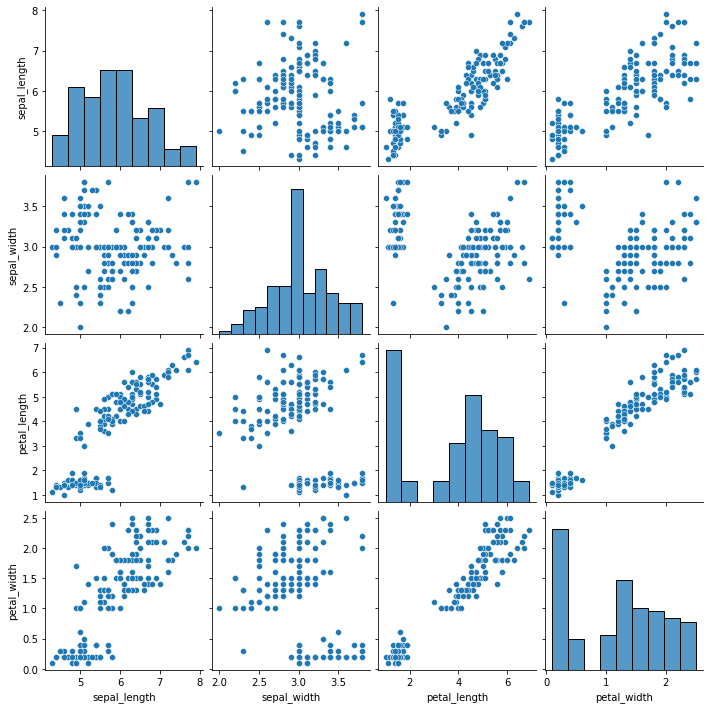

In [13]:
plt.figure(figsize=(10,10));
sns.pairplot(df,hue="class");
sns.pairplot(data=df.drop(columns=['class']))
sns.pairplot(data=df)


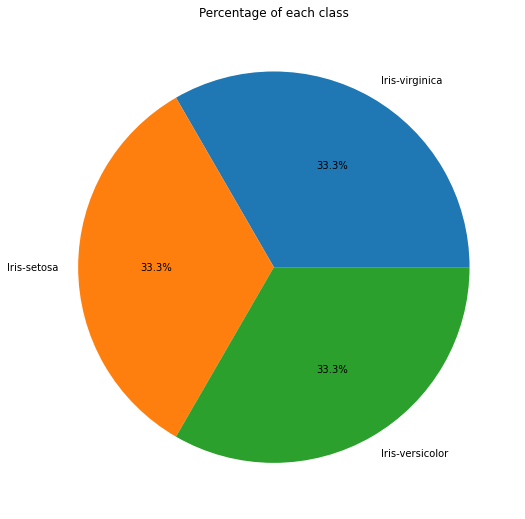

In [14]:
plt.figure(figsize=(9,9))
plt.pie(df["class"].value_counts(),labels=df["class"].value_counts().index,autopct='%1.1f%%')
plt.title("Percentage of each class")
plt.show()

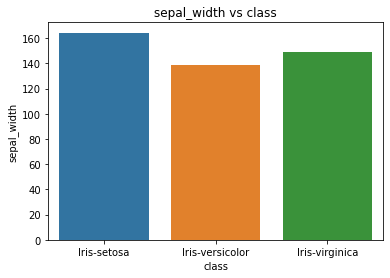

In [15]:
sns.barplot( x='class', y='sepal_width', estimator = np.sum, data=df, ci=None)
plt.title(" sepal_width vs class ")
plt.show()


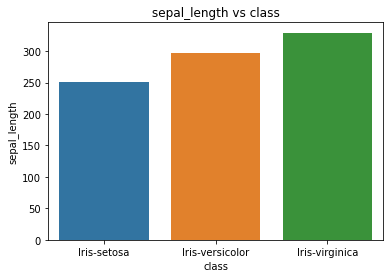

In [16]:
sns.barplot( x='class', y='sepal_length', estimator = np.sum, data=df, ci=None)
plt.title(" sepal_length vs class ")
plt.show()


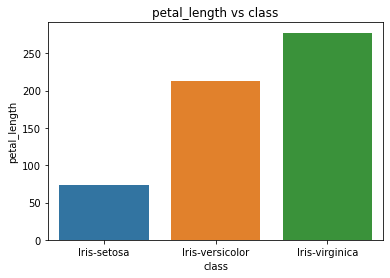

In [17]:
sns.barplot( x='class', y='petal_length', estimator = np.sum, data=df, ci=None)
plt.title("petal_length vs class")
plt.show()

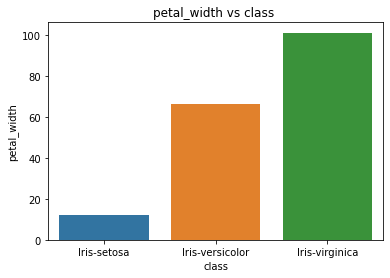

In [18]:
sns.barplot( x='class', y='petal_width', estimator = np.sum, data=df, ci=None)
plt.title("petal_width vs class ")
plt.show()

<h3>CORRELATION</h3>

In [19]:
corr=df.corr()
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.079267,0.871754,0.817954
sepal_width,-0.079267,1.000000,-0.331077,-0.270844
petal_length,0.871754,-0.331077,1.000000,0.962757
petal_width,0.817954,-0.270844,0.962757,1.000000


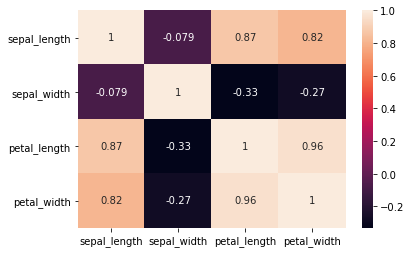

In [20]:
sns.heatmap(corr, annot=True);

<h3>MODEL BUILDING</h3>

<h3>LABEL ENCODING</h3>

In [21]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
df['class']=l.fit_transform(df['class'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<h3>SPLITTING DATA INTO TRAINING AND TESTING</h3>

In [28]:
from sklearn.model_selection import train_test_split

X=df.drop(columns=["class"])
Y=df["class"]
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.30)

<h3>MODEL TRAINING AND TESTING</h3>

<h3>LOGISTIC REGRESSION</h3>

In [29]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=100)
model.fit(x_train,y_train)

print("The accuracy of the model is :",model.score(x_test,y_test)*100)

The accuracy of the model is : 93.33333333333333


<h3>K Nearest Neighbours</h3>

In [30]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()

model.fit(x_train,y_train)

print("The accuracy of the model is :",model.score(x_test,y_test)*100)


The accuracy of the model is : 95.55555555555556


<h3>DECISION TREE</h3>

In [31]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

model.fit(x_train,y_train)

print("The accuracy of the model is :",model.score(x_test,y_test)*100)

The accuracy of the model is : 93.33333333333333


<h3>RANDOM FOREST
</h3>

In [32]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)

print("The accuracy of the model is :",model.score(x_test,y_test)*100)

The accuracy of the model is : 93.33333333333333


<h3>CONCLUSIONS</h3>

This dataset is best predicted using KNNeighbor classifier.